In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df=pd.read_csv("housepricedata.csv")

In [2]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
#Dropping the target column as it is not required for Unsupervised learning (clustering) algorithms
x = df.iloc[:, [0,1,2,3,4,5,6,7,8,9]].values

In [4]:
#K Means Clustering algorithm
#We build this K Means with 5 clusters
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 0 0 ... 0 0 0]


array([[1.00131292e+04, 6.09803922e+00, 5.51672434e+00, 1.07019146e+03,
        1.58362168e+00, 4.12918108e-01, 3.00115340e+00, 6.66782007e+00,
        5.96309112e-01, 4.83158016e+02],
       [1.63513500e+05, 6.25000000e+00, 5.75000000e+00, 1.68050000e+03,
        2.00000000e+00, 0.00000000e+00, 3.00000000e+00, 6.75000000e+00,
        2.00000000e+00, 5.42500000e+02],
       [1.65101598e+04, 6.74742268e+00, 5.59793814e+00, 1.28555670e+03,
        1.78350515e+00, 4.63917526e-01, 3.06185567e+00, 7.44329897e+00,
        1.02061856e+00, 5.86329897e+02],
       [4.51271111e+04, 6.72222222e+00, 5.22222222e+00, 1.80172222e+03,
        1.77777778e+00, 4.44444444e-01, 3.05555556e+00, 7.77777778e+00,
        1.44444444e+00, 7.14277778e+02],
       [5.31531300e+03, 5.73740053e+00, 5.71352785e+00, 8.68541114e+02,
        1.39522546e+00, 2.73209549e-01, 2.44562334e+00, 5.63395225e+00,
        3.87267905e-01, 3.78986737e+02]])

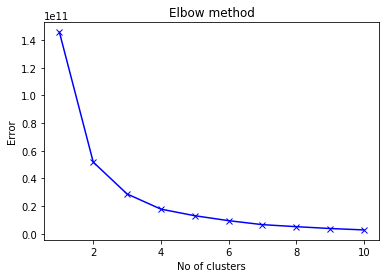

In [11]:
#A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error,'bx-')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [6]:
#To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.

In [7]:
#Let’s implement k-means again using k=3

kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)



[0 0 0 ... 0 0 0]


In [8]:
centers= kmeans3.cluster_centers_
kmeans3.cluster_centers_

array([[9.49043359e+03, 6.08854533e+00, 5.57484188e+00, 1.04584399e+03,
        1.56008433e+00, 3.82290935e-01, 2.86156008e+00, 6.49051300e+00,
        5.95221363e-01, 4.68958538e+02],
       [1.63513500e+05, 6.25000000e+00, 5.75000000e+00, 1.68050000e+03,
        2.00000000e+00, 0.00000000e+00, 3.00000000e+00, 6.75000000e+00,
        2.00000000e+00, 5.42500000e+02],
       [3.62311515e+04, 6.54545455e+00, 5.57575758e+00, 1.48148485e+03,
        1.72727273e+00, 4.54545455e-01, 3.06060606e+00, 7.66666667e+00,
        1.21212121e+00, 6.37969697e+02]])

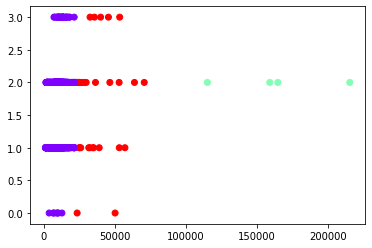

In [13]:
#Finally, its time to visualize the three clusters that were formed with the optimal k value. 
#You can clearly see three clusters in the image below, with each cluster represented by a different color.
#Scatter plot with 3 clusters (between Lot Area vs Full Bath)

plt.scatter(x[:, 0], x[:, 4], c=y_kmeans3, cmap='rainbow')

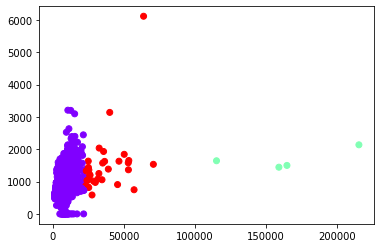

In [12]:
#Finally, its time to visualize the three clusters that were formed with the optimal k value. 
#You can clearly see three clusters in the image below, with each cluster represented by a different color.
#Scatter plot with 3 clusters (between Lot Area vs TotalBsmtSF- basement square feet )

plt.scatter(x[:, 0], x[:, 3], c=y_kmeans3, cmap='rainbow')